# Data Preparation and Cleaning

In [2]:
import pandas as pd

# Load the CSV file into a DataFrame

df_athlete_events = pd.read_csv(r'C:\Python.Workspace\DataScience_CapstoneProject\1. Original Data\athlete_events.csv')

# Display the first rows to get an overview of the data

df_athlete_events.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [3]:
# Common statistics
stats = df_athlete_events.describe()

#Missing values

missing_values = df_athlete_events.isnull().sum()

stats, missing_values

(                  ID            Age         Height         Weight  \
 count  271116.000000  261642.000000  210945.000000  208241.000000   
 mean    68248.954396      25.556898     175.338970      70.702393   
 std     39022.286345       6.393561      10.518462      14.348020   
 min         1.000000      10.000000     127.000000      25.000000   
 25%     34643.000000      21.000000     168.000000      60.000000   
 50%     68205.000000      24.000000     175.000000      70.000000   
 75%    102097.250000      28.000000     183.000000      79.000000   
 max    135571.000000      97.000000     226.000000     214.000000   
 
                 Year  
 count  271116.000000  
 mean     1978.378480  
 std        29.877632  
 min      1896.000000  
 25%      1960.000000  
 50%      1988.000000  
 75%      2002.000000  
 max      2016.000000  ,
 ID             0
 Name           0
 Sex            0
 Age         9474
 Height     60171
 Weight     62875
 Team           0
 NOC            0
 Games 

## Cleaning the data

In [4]:
# Cleaning the records with null values

df_athlete_events_cleaned = df_athlete_events.dropna()

# Compare the sizes of the original and cleaned datasets
original_size = df_athlete_events.shape[0]
cleaned_size = df_athlete_events_cleaned.shape[0]

original_size, cleaned_size

(271116, 30181)

## First Statistical Visualizations

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Helper-function for Visualizations
def plot_distributions(data, title_suffix):
    plt.figure(figsize=(15,12))

    # Gender distribution
    plt.subplot(2, 2, 1)
    sns.countplot(data=data, x='Sex')
    plt.title(f'Gender Distribution ({title_suffix})')

    # Age distribution
    plt.subplot(2, 2, 2)
    sns.histplot(data['Age'].dropna(), bins=30)
    plt.title(f'Age Distribution ({title_suffix})')

    # Medal distribution
    plt.subplot(2, 2, 3)
    sns.countplot(data=data, x='Medal')
    plt.title(f'Medal Distribution ({title_suffix})')

    # Top-Nations
    top_countries = data[data['Medal'].notnull()]['Team'].value_counts().head(10)
    plt.subplot(2, 2, 4)
    top_countries.plot(kind='bar')
    plt.title(f'Top 10 Nations ({title_suffix})')

    plt.tight_layout()
    plt.show()

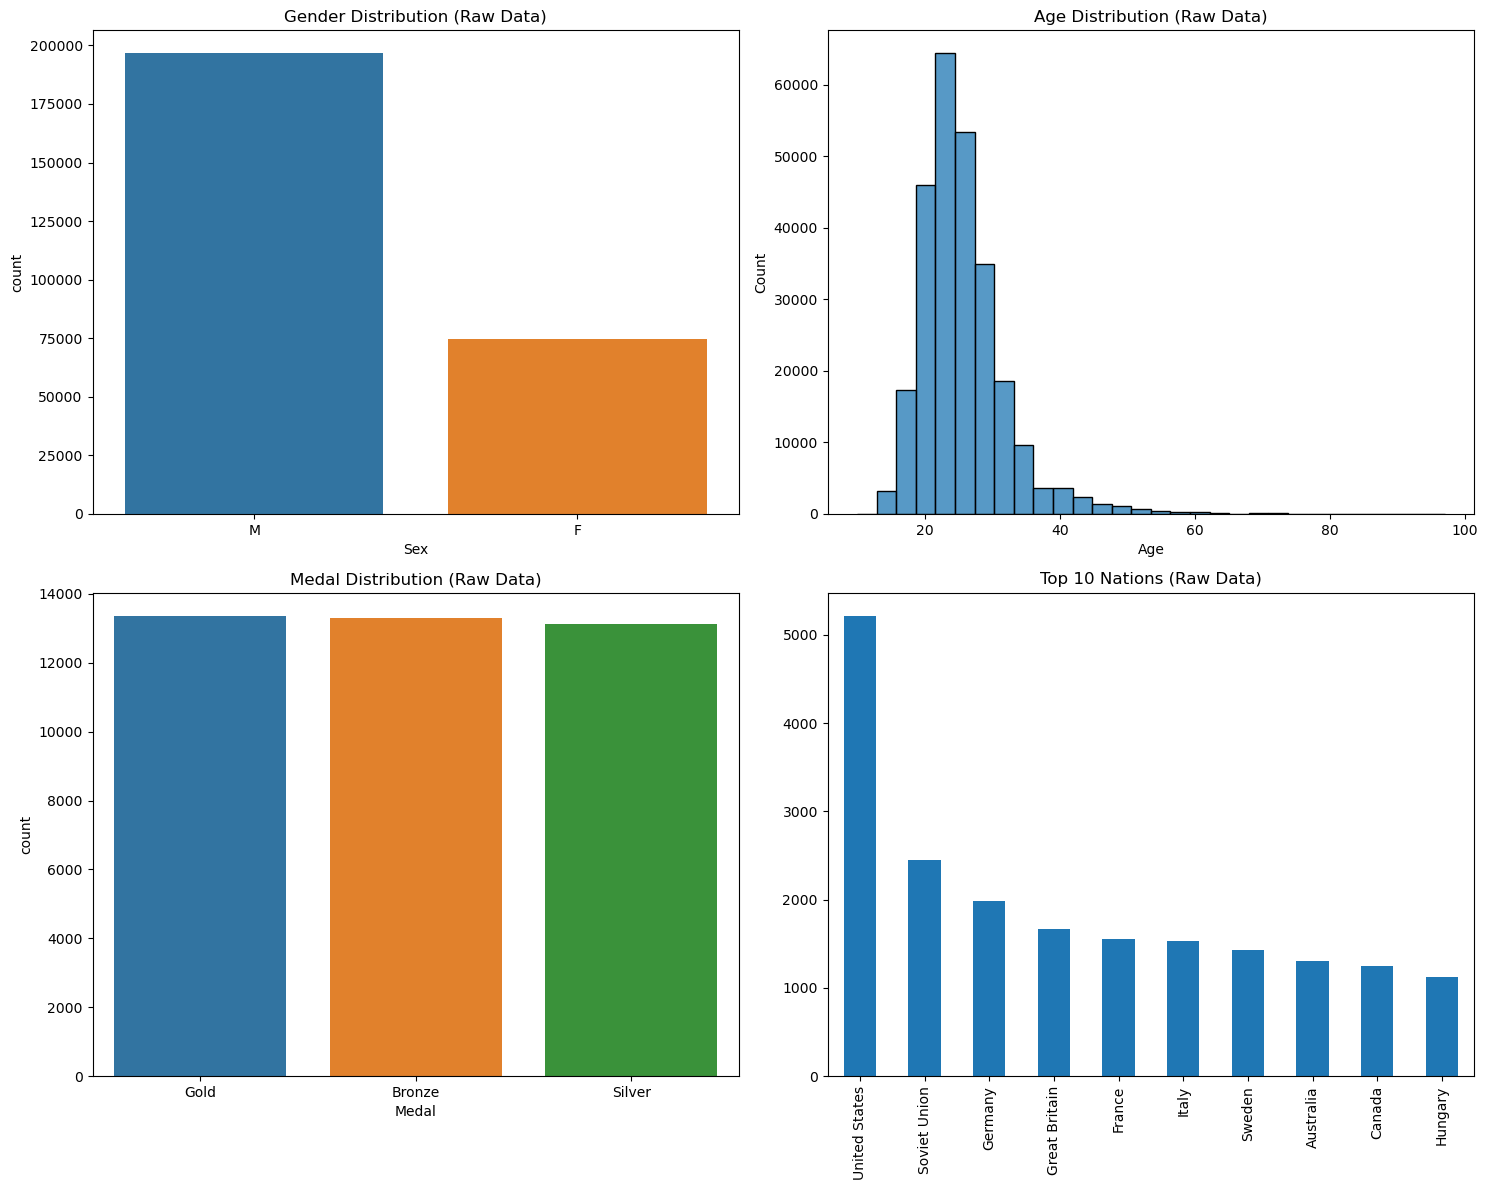

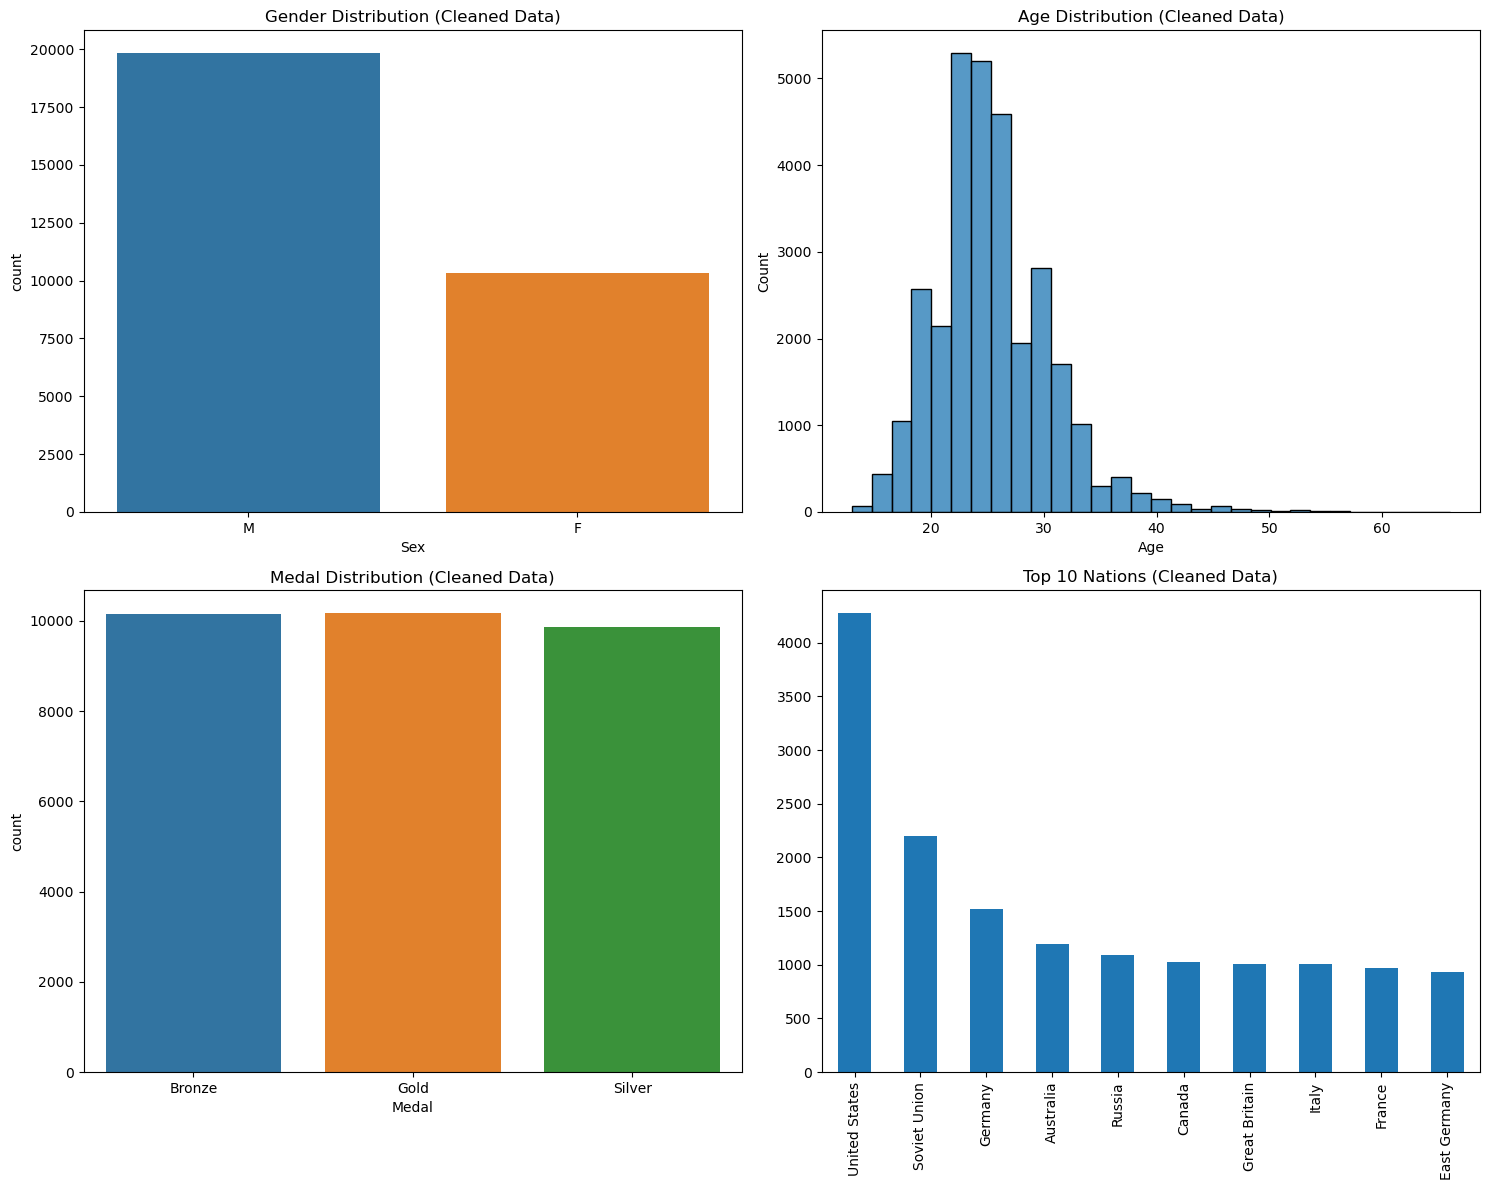

In [12]:

# plot distributions for raw data
plot_distributions(df_athlete_events, "Raw Data")
# plot distributions for cleaned data
plot_distributions(df_athlete_events_cleaned, "Cleaned Data")